In [61]:
import numpy as np
import pandas as pd
import math
import random
from sklearn import linear_model, datasets
import matplotlib.pyplot as plt
f=pd.read_csv("/home/mt/learn/NGSIM数据处理/csv/80/算法数据/RL_label.csv")
F1=f[['Vehicle_ID','Local_X','Local_Y','v_Class','v_Vel','v_Acc','x','x_v','y','y_v','Lane_ID','label']]
y_list=np.reshape(f.y.values,[-1,40])
vy_list=np.reshape(f.y_v.values,[-1,40])
v_list=np.reshape(f.v_Vel.values,[-1,40])
x_list=np.reshape(f.x.values,[-1,40])
data_num=int(len(F1)/40)
change_local=x_list[:,-1]
vx_list=np.reshape(f.x_v.values,[-1,40])
local_x=np.reshape(f.Local_X.values,[-1,40])
local_y=np.reshape(f.Local_Y.values,[-1,40])
local_x1=local_x[:,0]
local_x40=local_x[:,39]
x_change=local_x40-local_x1
vy_list

array([[19.99, 19.82, 19.94, ..., 16.29, 16.29, 16.3 ],
       [27.41, 28.35, 29.86, ..., 29.98, 29.17, 28.86],
       [20.07, 20.09, 19.9 , ..., 22.05, 22.22, 22.07],
       ...,
       [24.96, 24.93, 25.42, ..., 19.76, 19.74, 19.74],
       [29.5 , 29.5 , 29.47, ..., 29.65, 29.66, 29.66],
       [23.18, 22.32, 23.26, ..., 18.  , 18.01, 17.84]])

In [2]:
# def creat_points(frames, point_num,y_list,vy_list,v_list,data_num):
#     v=[]
#     vy=[]
#     l=[]
#     for i in range(point_num):
#         total_y=0
#         start_frame=40-frames
#         start_frame = random.randint(0, 40-frames)
#         end_frame = start_frame + frames
#         point_id = random.randint(0, data_num-1)
#         v.append(v_list[point_id][start_frame])
#         vy.append(vy_list[point_id][start_frame])
#         for a in range(frames-1):
#             total_y+=y_list[point_id][start_frame+1+a]
#         l.append(total_y)
#     return v,vy,l

In [3]:
def creat_points1(start_frame,frames,y_list,vy_list,v_list,data_num):
    v=[]
    vy=[]
    l=[]
    for i in range(data_num):
        total_y=0
        v.append(v_list[i][start_frame])
        vy.append(vy_list[i][start_frame])
        for a in range(frames):
            total_y+=y_list[i][start_frame+1+a]
        l.append(total_y)
    return v,vy,l

In [4]:
def creat_points(start_frame,frames,y_list,vy_list,v_list,data_num):
    v=[]
    vy=[]
    l=[]
    for i in range(data_num):
        total_y=0
        v.append(v_list[i][start_frame])
        vy.append(vy_list[i][start_frame])
        for a in range(frames-1):
            total_y+=y_list[i][start_frame+1+a]
        l.append(total_y)
    return v,vy,l

In [5]:
# vy1=vy2=vy3=vy4=[]
vy3_total=[]
l3_total=[]
for i in range(3):
    v,vy,l=creat_points1(start_frame=10*i,frames=10,y_list=y_list,vy_list=vy_list,v_list=v_list,data_num=data_num)
    vy3_total.append(vy)
    l3_total.append(l)  
v4,vy4,l4_list=creat_points(start_frame=30,frames=10,y_list=y_list,vy_list=vy_list,v_list=v_list,data_num=data_num)
l4_list=[l4_list]
vy4=[vy4]
vy4

[[16.299999999998818,
  32.55999999999972,
  14.849999999999001,
  20.66000000000031,
  12.950000000000728,
  10.489999999999783,
  28.180000000000405,
  39.32000000000244,
  26.6599999999994,
  20.990000000000464,
  26.880000000001026,
  27.52999999999929,
  26.6599999999994,
  19.879999999999995,
  20.080000000000094,
  27.870000000000342,
  26.470000000001626,
  45.13999999999896,
  32.420000000000755,
  51.979999999998654,
  23.61000000000104,
  35.720000000001164,
  29.969999999999573,
  36.80000000000064,
  22.559999999999718,
  29.089999999999925,
  37.070000000000505,
  35.240000000001146,
  39.58999999999946,
  22.409999999998718,
  31.400000000001,
  35.78000000000202,
  24.849999999999,
  34.7199999999998,
  36.21000000000009,
  26.270000000000092,
  27.549999999999947,
  52.95999999999992,
  26.83999999999969,
  22.19000000000051,
  58.809999999999725,
  27.28999999999928,
  35.44000000000097,
  28.99000000000001,
  34.2300000000003,
  31.629999999999967,
  29.1100000000000

In [83]:
l_total=l3_total+l4_list
vy_total=vy3_total+vy4
l_total=np.array(l_total)
vy_total=np.array(vy_total)
l_total

array([[21.127, 32.364, 18.577, ..., 23.908, 29.549, 24.526],
       [18.461, 30.215, 20.768, ..., 22.068, 26.887, 19.538],
       [16.294, 30.792, 17.113, ..., 22.955, 24.648, 18.721],
       [14.663, 27.917, 17.447, ..., 19.981, 25.733, 16.343]])

In [7]:
l4_new=l_total[0]+l_total[1]+l_total[2]+l_total[3]
l4_new

array([ 70.545, 121.288,  73.905,  71.958,  52.286,  46.709, 124.805,
       141.024, 111.885,  86.96 , 112.152, 104.025, 112.617,  75.737,
        80.172,  96.082, 111.229, 186.446, 121.362, 216.601,  98.317,
       139.375, 118.513, 144.109,  82.366, 122.279, 135.203, 128.58 ,
       153.96 ,  88.713, 121.942, 146.086,  97.056, 155.541, 119.875,
       105.995,  96.453, 243.49 , 106.558,  85.358, 231.576, 104.626,
       138.699, 123.125, 128.406, 109.926, 111.216, 110.37 ,  89.545,
        97.454, 107.468, 139.8  ,  61.581, 146.611, 135.222, 121.934,
       124.47 , 108.691,  99.694, 114.734,  94.777, 114.37 , 116.954,
       114.894,  43.643, 108.084, 103.432, 209.451, 126.406,  89.97 ,
       211.131,  82.267, 126.016,  91.47 , 113.308,  61.662,  34.762,
       191.287,  70.477,  41.819,  79.114, 147.837, 118.026,  76.401,
       106.976,  61.36 ,  60.283,  96.35 ,  81.1  ,  59.846,  97.06 ,
        88.973,  54.552,  69.088,  91.99 ,  10.621, 103.074,  61.845,
        67.742,  83.

In [86]:
distance_x1=local_x[:,8:11]
distance_x2=local_x[:,18:21]
distance_x3=local_x[:,28:31]
distance_y1=local_y[:,8:11]
distance_y2=local_y[:,18:21]
distance_y3=local_y[:,28:31]

array([[42.172, 42.227, 42.274],
       [ 7.174,  7.231,  7.309],
       [31.394, 31.493, 31.592],
       ...,
       [27.899, 27.897, 27.887],
       [27.339, 27.35 , 27.334],
       [53.275, 53.271, 53.241]])

In [87]:
def get_angel(arr1,arr2):
    angel=[]
    for i in range(len(arr1)):
        a=math.atan((arr2[i][2]-arr2[i][0])/(arr1[i][2]-arr1[i][0]+math.exp(-10)))
        if a>=0:
            angel.append(a)
        else:
            angel.append(math.pi+a)
    return angel
angel1=get_angel(distance_x1,distance_y1)
angel2=get_angel(distance_x2,distance_y2)
angel3=get_angel(distance_x3,distance_y3)
angel1

[1.5479560191365984,
 1.5507238929122968,
 1.5155788885748553,
 1.468070971067425,
 1.4297464069293082,
 1.4678593046320259,
 1.5556482961941143,
 1.5750851314393421,
 1.5941969055208798,
 1.532049842354058,
 1.658425510913452,
 1.5074508674211933,
 1.5054341774920728,
 1.5999985059434914,
 1.5652123286357527,
 1.5511936790893404,
 1.572955063663217,
 1.5480566375638054,
 1.5121783675048297,
 1.6023152028791208,
 1.511102862497322,
 1.5209921875402903,
 1.572893989987745,
 1.5122954315747776,
 1.5367464346860487,
 1.562016618524457,
 1.5194615673615401,
 1.5464845344583782,
 1.5573686725251015,
 1.5712460736744291,
 1.4834185842853602,
 1.608440717754235,
 1.5007792827364737,
 1.5619080454063439,
 1.5383758154311107,
 1.5449887330237009,
 1.544255890082579,
 1.5588348340534095,
 1.5701185919464495,
 1.5052762583362536,
 1.5684658550001551,
 1.5437776082075547,
 1.5723727537621914,
 1.5254358632334797,
 1.5666441489768965,
 1.4546090544911745,
 1.5748855153492558,
 1.5956441320401291,
 

In [8]:
pre_ran_total=[]
for i in range(4):
    X=np.reshape(vy_total[i],[-1,1])
    Y=l_total[i]
    model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
    model_ransac.fit(X, Y)
    pre_ransac=model_ransac.predict(X)
#     pre_liner=model.predict(X)
    pre_ran_total.append(pre_ransac)
pre_ran_total

[array([20.17556427, 27.52409731, 20.25479374, 19.84874272, 19.42288433,
        13.50048169, 34.91224509, 30.09905499, 30.0891513 , 25.9890264 ,
        26.25642585, 26.95958736, 32.07979166, 18.98712227, 20.78959264,
        21.61159835, 29.89107764, 54.67009338, 28.2470662 , 60.10721554,
        22.07707147, 35.91251711, 32.19863586, 40.11167885, 21.15602892,
        39.79476099, 27.68255625, 30.07924762, 43.98401904, 22.87926982,
        27.67265256, 34.62503828, 25.19673173, 41.54771294, 21.41352469,
        27.30621628, 25.21653909, 70.31791307, 30.42587654, 20.58161529,
        53.93722081, 30.3268397 , 34.82311194, 31.55489644, 31.68364432,
        34.93205246, 31.69354801, 32.05998429, 20.215179  , 25.13730963,
        25.97912271, 35.11031876, 11.91589235, 34.06052833, 32.44622794,
        21.12631787, 31.85200694, 25.18682804, 25.17692436, 29.89107764,
        27.4745789 , 19.6803801 , 24.14694129, 29.18791612, 10.76706509,
        20.18546795, 24.63222178, 54.45221234, 31.2

In [9]:
pre_l4=pre_ran_total[0]+pre_ran_total[1]+pre_ran_total[2]+pre_ran_total[3]

array([ 74.75724227, 120.84202254,  74.63836846,  74.71343617,
        58.34653904,  41.15652622, 125.33349615, 135.53913274,
       114.33545574,  91.623744  , 109.07403659, 108.08582609,
       118.75720399,  73.59713118,  80.50523   ,  95.9767623 ,
       115.26603755, 193.99142543, 118.52013845, 218.35054298,
        95.45195829, 139.70719776, 117.67716234, 147.39130747,
        82.04189809, 130.27138907, 126.90616141, 127.35442875,
       154.41165299,  87.81215349, 119.12679019, 143.12891408,
        98.07586197, 156.80993816, 114.42748655, 100.49137241,
        97.96956994, 255.73999963, 109.7452959 ,  85.72198384,
       223.94528349, 105.80210454, 136.54179893, 123.38924405,
       122.34974324, 113.37791856, 117.02738292, 112.06228112,
        81.8062264 ,  98.37577258, 105.60143732, 137.13676969,
        54.6054327 , 146.42061633, 135.67387294, 112.61855019,
       125.19135414, 106.55423663,  97.10597503, 116.24476313,
        95.56129503, 101.16631304, 114.51895219, 115.47

In [88]:
hypotenuse1=pre_ran_total[1]
hypotenuse2=pre_ran_total[2]
hypotenuse3=pre_ran_total[3]
def get_xy(x_arr,y_arr,angel,hypotenuse):
    x=[]
    y=[]
    for i in range(len(angel1)):
        x.append(x_arr[i]+hypotenuse[i]*math.cos(angel[i]))
        y.append(y_arr[i]+hypotenuse[i]*math.sin(angel[i]))
    return x,y      

In [105]:
x1_new,y1_new=get_xy(local_x[:,10],local_y[:,10],angel1,hypotenuse1)
x2_new,y2_new=get_xy(local_x[:,20],local_y[:,20],angel2,hypotenuse2)
x3_new,y3_new=get_xy(local_x[:,30],local_y[:,30],angel3,hypotenuse3)
xy1_new=np.array([x1_new]+[y1_new]).transpose()
xy2_new=np.array([x2_new]+[y2_new]).transpose()
xy3_new=np.array([x3_new]+[y3_new]).transpose()
xy3_new

array([[  48.1037207 , 1522.92469983],
       [  11.7909186 ,  468.85843966],
       [  33.63986379,  579.06637928],
       [  48.07553624, 1122.3529891 ],
       [  60.38369075, 1520.49479873],
       [  34.55189227,  185.30606913],
       [  45.16565521,  446.51382701],
       [  24.91025326, 1493.2242844 ],
       [  23.67856876, 1054.11306625],
       [  35.36370908,  387.04950365],
       [  27.63855878,  731.18545117],
       [  35.5218097 , 1158.96832441],
       [  47.9719733 , 1411.90239543],
       [  21.77804966,  487.7687917 ],
       [  23.26266278,  272.71991426],
       [  25.08090973,  461.08436751],
       [  21.89622836, 1222.48044477],
       [  13.72250087, 1402.09415156],
       [  35.90093647,  745.64941067],
       [  11.87494089, 1452.82086265],
       [  60.28798213,  864.69972401],
       [  23.85406843, 1335.03462357],
       [  46.3252251 ,  847.69107858],
       [  60.10982704, 1377.28245242],
       [  47.37352135,  491.66541628],
       [  47.94322884,  3

In [11]:
def calculate(arr):
    l0_40=[]
    l10_40=[]
    l20_40=[]
    l30_40=[]
    for i in range(len(arr)):
        l0_40.append(arr[i]*3.06+23)
        l10_40.append(arr[i]*2.3+17)
        l20_40.append(arr[i]*1.6+9)
        l30_40.append(arr[i]*0.845+2.06)
    return l0_40,l10_40,l20_40,l30_40    

In [12]:
y0_total=calculate(vy_total[0])[0]
y1_list=pre_ran_total[0]
y0_total

[84.16939999999377,
 106.8746000000013,
 84.41420000000191,
 83.15960000000373,
 81.84380000000006,
 63.54500000000051,
 129.70220000000072,
 114.8305999999993,
 114.8,
 102.13160000000039,
 102.95780000000175,
 105.13039999999906,
 120.95060000000068,
 80.4974000000006,
 86.06660000000022,
 88.60640000000016,
 114.18800000000057,
 190.74919999999915,
 109.1084000000024,
 207.5485999999985,
 90.04460000000094,
 132.7928000000059,
 121.3178000000024,
 145.76720000000523,
 87.19879999999867,
 144.78799999999967,
 107.36420000000017,
 114.76939999999726,
 157.73179999999977,
 92.52319999999798,
 107.33360000000262,
 128.8147999999956,
 99.68360000000261,
 150.20419999999945,
 87.99439999999986,
 106.2014000000007,
 99.74480000000118,
 239.0971999999995,
 115.84039999999978,
 85.4239999999989,
 188.48479999999702,
 115.53440000000003,
 129.4268000000003,
 119.32879999999902,
 119.72660000000003,
 129.76339999999988,
 119.75720000000105,
 120.88939999999513,
 84.2918000000013,
 99.5,
 102.1

In [13]:
y1_total=l_total[0]+calculate(vy_total[1])[1]
y2_list=l_total[0]+pre_ran_total[1]
y1_total

array([ 90.061, 126.598,  76.609,  77.36 ,  61.524,  55.435, 125.047,
       124.078, 115.35 ,  96.219, 114.295, 106.47 , 122.406,  69.466,
        85.094,  99.192, 116.035, 199.789, 116.604, 220.869,  97.973,
       134.892, 112.596, 139.82 ,  81.504, 145.745, 119.195, 115.975,
       150.896,  89.71 , 120.317, 147.214,  99.142, 168.407, 108.756,
        95.871,  83.275, 245.582, 114.507,  88.859, 202.027, 101.61 ,
       131.638, 124.26 , 112.963, 106.163, 115.391, 104.459,  82.973,
        99.501, 106.825, 135.719,  39.244, 136.253, 131.705, 118.439,
       116.019, 104.273,  96.31 , 108.831, 104.11 , 100.664, 115.156,
       116.727,  55.109,  95.39 , 105.036, 206.215, 100.085, 111.046,
       190.025,  92.739,  95.683,  85.014, 100.081,  53.592,  31.587,
       209.936,  80.342,  54.966,  81.351, 167.188,  78.038,  79.372,
       119.14 ,  72.189,  45.937,  96.694,  82.694,  55.498,  81.618,
        92.232,  53.297,  68.417,  92.105,  17.   , 104.19 ,  65.193,
        77.798,  84.

In [14]:
y2_total=l_total[0]+l_total[1]+calculate(vy_total[2])[2]
y3_list=l_total[0]+l_total[1]+pre_ran_total[2]
y2_total

array([ 74.668, 119.611,  83.977,  73.081,  57.406,  40.132, 126.169,
       132.774, 116.948,  91.081, 108.714, 104.926, 119.907,  75.958,
        81.787,  94.65 , 119.621, 184.424, 117.798, 210.004, 100.962,
       137.652, 115.506, 141.972,  80.98 , 119.011, 127.43 , 127.705,
       146.7  ,  88.795, 121.717, 143.241,  98.585, 157.78 , 112.07 ,
       101.991,  97.664, 259.077, 105.112,  87.378, 224.259, 102.869,
       134.58 , 127.351, 117.263,  98.163, 113.878, 110.731,  81.071,
        99.   , 107.97 , 133.819,  50.654, 158.124, 133.088, 119.861,
       122.289, 109.038, 101.376, 113.57 ,  91.194, 103.108, 116.44 ,
       114.885,  49.333,  84.253, 104.485, 205.331, 118.293,  94.425,
       207.965,  89.47 , 125.608,  93.201, 100.681,  58.458,  36.008,
       193.609,  78.133,  43.457,  82.629, 149.846, 116.984,  75.204,
       105.841,  65.474,  30.157,  98.884,  83.505,  61.263,  62.635,
        91.058,  58.792,  72.115,  90.41 ,   9.   , 109.759,  63.314,
        72.439,  82.

In [15]:
y3_total=l_total[0]+l_total[1]+l_total[2]+calculate(vy_total[3])[3]
y4_list=l_total[0]+l_total[1]+l_total[2]+pre_ran_total[3]
y3_total

array([ 71.7155 , 122.9442 ,  71.06625,  73.1407 ,  53.63675,  42.90905,
       120.8161 , 139.7464 , 113.3877 ,  87.63755, 106.2056 , 104.65485,
       113.2497 ,  73.7716 ,  79.7986 ,  99.21315, 113.54415, 190.6943 ,
       121.8869 , 215.8111 ,  97.07745, 139.4694 , 116.69565, 144.04   ,
        82.4922 , 123.08205, 133.27415, 128.6968 , 153.14255,  87.94945,
       122.484  , 143.3561 ,  97.66825, 155.9654 , 119.43345, 102.54315,
        96.61175, 244.6322 , 105.5478 ,  86.11555, 227.90745, 105.48405,
       136.9758 , 122.85855, 123.21635, 106.40735, 113.20895, 110.8596 ,
        82.937  ,  98.127  , 107.6037 , 137.5958 ,  62.37085, 146.68205,
       137.02245, 120.65045, 124.82885, 108.67975,  95.8019 , 113.53315,
        92.7099 , 111.57985, 117.2819 , 115.3279 ,  45.1168 , 108.32345,
       104.0442 , 210.5678 , 118.86595,  90.8474 , 208.033  ,  80.6684 ,
       127.12485,  92.2943 , 104.1058 ,  61.57685,  36.3733 , 193.27005,
        70.57825,  45.18865,  79.5529 , 148.498  , 

In [16]:
y1_list=np.reshape(y1_list,[1,-1])
y1_list

array([[20.17556427, 27.52409731, 20.25479374, 19.84874272, 19.42288433,
        13.50048169, 34.91224509, 30.09905499, 30.0891513 , 25.9890264 ,
        26.25642585, 26.95958736, 32.07979166, 18.98712227, 20.78959264,
        21.61159835, 29.89107764, 54.67009338, 28.2470662 , 60.10721554,
        22.07707147, 35.91251711, 32.19863586, 40.11167885, 21.15602892,
        39.79476099, 27.68255625, 30.07924762, 43.98401904, 22.87926982,
        27.67265256, 34.62503828, 25.19673173, 41.54771294, 21.41352469,
        27.30621628, 25.21653909, 70.31791307, 30.42587654, 20.58161529,
        53.93722081, 30.3268397 , 34.82311194, 31.55489644, 31.68364432,
        34.93205246, 31.69354801, 32.05998429, 20.215179  , 25.13730963,
        25.97912271, 35.11031876, 11.91589235, 34.06052833, 32.44622794,
        21.12631787, 31.85200694, 25.18682804, 25.17692436, 29.89107764,
        27.4745789 , 19.6803801 , 24.14694129, 29.18791612, 10.76706509,
        20.18546795, 24.63222178, 54.45221234, 31.2

In [17]:
y2_list=np.reshape(y2_list,[1,-1])
y2_list

array([[ 43.74585979,  65.69949039,  36.57796624,  37.05055646,
         27.97593682,  24.29982158,  65.15606864,  63.59047626,
         59.50263925,  48.2068859 ,  57.83778925,  52.54499249,
         63.72151102,  31.75504774,  41.35083585,  49.57571526,
         59.81642621, 109.53814507,  60.12027404, 124.4533571 ,
         48.50254896,  71.15636216,  58.43235553,  74.06920566,
         39.20591518,  78.1911709 ,  61.84952948,  59.76968382,
         82.24178939,  44.33615   ,  62.30864905,  77.39311984,
         49.76435222,  90.22056885,  53.58477728,  49.34373806,
         41.10949127, 136.87655398,  59.00433707,  43.04764892,
        110.92765813,  52.60356526,  69.24138063,  65.24407081,
         58.22927837,  54.63761963,  59.71598816,  54.53779027,
         40.09158041,  49.97751852,  54.71628486,  72.08942303,
         14.32663998,  71.43023826,  68.30080238,  60.41739145,
         59.90648708,  52.12451203,  48.23159786,  55.0783414 ,
         53.52590984,  50.55718375,  57.

In [18]:
y3_list=np.reshape(y3_list,[1,-1])
y3_list

array([[ 56.45810131,  92.64454487,  61.95685044,  54.39242657,
         41.33418178,  28.87245842,  97.98351988, 101.65264819,
         89.96878021,  69.20126169,  83.11336344,  79.60618595,
         92.69801634,  55.69937345,  61.20287463,  71.92141183,
         91.95887092, 148.85416434,  90.61454566, 169.0219487 ,
         76.24212495, 107.02846991,  88.89057301, 110.67194296,
         60.41502162,  95.07615151,  97.54043784,  97.44526271,
        116.41473339,  66.95355567,  93.87616569, 112.49620565,
         74.89906237, 125.98850357,  84.72060508,  77.57109444,
         72.17824537, 206.64504911,  81.34309208,  65.4791147 ,
        177.00950087,  78.75544627, 104.5117326 ,  98.29114071,
         90.06039867,  75.93223355,  87.57530716,  84.7793353 ,
         60.46772764,  75.23747441,  82.59912731, 104.75275838,
         34.03330142, 121.23940441, 103.21758483,  92.00740103,
         93.68228612,  82.94592405,  76.70080125,  86.47589827,
         70.16949388,  78.2285667 ,  88.

In [19]:
y4_list=np.reshape(y4_list,[1,-1])
y4_list

array([[ 70.9747169 , 123.28788997,  70.22875805,  72.69071042,
         52.6725361 ,  41.78076453, 120.86766254, 140.54095331,
        113.33788498,  87.20957002, 106.17045805, 104.66306029,
        113.19988498,  73.26958772,  79.30992688,  99.24403685,
        113.48166279, 191.87702263, 122.22125256, 217.45002164,
         96.82421291, 140.02384857, 116.86659795, 144.66647999,
         82.16893236, 123.19430568, 133.91863785, 129.21923461,
        153.95511116,  87.616178  , 122.75032288, 143.91455032,
         97.49771565, 156.45315281, 120.02057949, 102.46732363,
         96.62129421, 246.33648348, 105.50999022,  85.76760493,
        230.00190368, 105.47625331, 137.51157376, 122.9641361 ,
        123.67142189, 106.68901291, 113.32253959, 110.93117126,
         82.62973934,  97.96647002, 107.59390244, 138.19826952,
         62.08559895, 147.11444533, 137.6362578 , 120.91743984,
        125.25057401, 108.71597251,  95.52265156, 113.73744583,
         92.41731241, 111.86818249, 117.

In [20]:
y0_list=np.zeros([1,454])
y0_list

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [21]:
y_total_list=np.vstack((y0_list,y1_list,y2_list,y3_list,y4_list))
y_total_list=np.transpose(y_total_list)
for i in range(5):
    y_total_list[:,i]=local_y[:,0]+y_total_list[:,i]
# y_total_list=np.transpose(y_total_list)
y_total_list

array([[1452.031     , 1472.20656427, 1495.77685979, 1508.48910131,
        1523.0057169 ],
       [ 345.763     ,  373.28709731,  411.46249039,  438.40754487,
         469.05088997],
       [ 508.838     ,  529.09279374,  545.41596624,  570.79485044,
         579.06675805],
       ...,
       [ 363.83      ,  388.92769489,  411.09728154,  431.51378943,
         458.8214169 ],
       [1151.781     , 1181.37496713, 1206.49162396, 1235.11833136,
        1248.87852962],
       [ 424.997     ,  448.33183926,  469.94007932,  488.73946101,
         504.76192713]])

In [22]:
x_list

array([[-0.006, -0.004, -0.006, ...,  0.168,  0.17 ,  0.17 ],
       [ 0.002,  0.011,  0.029, ...,  0.378,  0.394,  0.396],
       [ 0.05 ,  0.046,  0.048, ...,  0.312,  0.305,  0.305],
       ...,
       [ 0.006, -0.028, -0.043, ..., -0.305, -0.304, -0.305],
       [-0.101, -0.102, -0.102, ..., -0.201, -0.201, -0.202],
       [ 0.548,  0.166,  0.094, ..., -0.301, -0.301, -0.301]])

In [23]:
decision_list=[]
for i in range(len(x_list)):
    a_list=[]
    for a in range(len(x_list[i])-2):
        if abs(x_list[i][a])>=0.1 and abs(x_list[i][a+1])>=0.1 and abs(x_list[i][a+2])>=0.1:
            a_list.append(a)
    if a_list!=[]:
        decision_list.append(a_list[0])
    else:
        decision_list.append(0)
decision_list=np.reshape(decision_list,[-1,1])
np.shape(decision_list)

(454, 1)

In [24]:
label_list=np.reshape(f.label.values,[-1,40])
label_list=label_list[:,0]
label_list=np.reshape(label_list,[-1,1])
np.shape(label_list)

(454, 1)

In [25]:
change_time=(40-decision_list)/10
np.shape(change_time)

(454, 1)

In [26]:
local_x1=np.reshape(local_x1,[-1,1])
local_x40=np.reshape(local_x40,[-1,1])
x_change=np.reshape(x_change,[-1,1])
cl_list=np.hstack((decision_list,change_time,local_x1,local_x40,x_change,label_list))
cl_list

array([[11.   ,  2.9  , 41.776, 48.069,  6.293,  2.   ],
       [26.   ,  1.4  ,  6.815, 11.641,  4.826,  2.   ],
       [13.   ,  2.7  , 30.752, 35.984,  5.232,  2.   ],
       ...,
       [14.   ,  2.6  , 27.616, 23.973, -3.643,  1.   ],
       [ 0.   ,  4.   , 27.954, 24.105, -3.849,  1.   ],
       [14.   ,  2.6  , 52.955, 48.104, -4.851,  1.   ]])

In [27]:
import math
a=math.sin(math.pi/8)
b=math.sin(math.pi/4)
c=math.sin(math.pi*3/8)
print(a,b,c)

0.3826834323650898 0.7071067811865475 0.9238795325112867


In [28]:
x0_list=local_x[:,0]
x0_list=np.reshape(x0_list,[1,-1])
x0_list

array([[41.776,  6.815, 30.752, 42.446, 53.639, 30.975, 42.059, 18.374,
        16.923, 30.824, 28.876, 30.363, 42.645, 19.032, 17.089, 19.907,
        17.666,  3.493, 28.395,  5.432, 56.772, 17.028, 42.422, 53.163,
        45.047, 45.975, 42.29 , 41.924, 29.469, 30.859, 36.951, 55.158,
        28.403,  9.394, 27.036, 18.792, 28.82 ,  6.961, 30.869, 30.105,
         4.694, 40.615, 43.281, 18.468, 43.476, 36.313, 56.151, 15.031,
        14.432, 11.686, 27.3  , 42.775, 54.367, 41.435, 50.67 , 18.149,
        42.54 , 45.17 , 53.24 , 27.389, 18.757, 30.595, 30.848, 17.186,
        30.011, 39.454, 54.977,  5.924, 27.604, 26.228,  2.508, 16.657,
        30.373, 27.655, 39.464, 42.494, 55.834,  7.637, 17.13 , 31.603,
        30.15 ,  6.701, 28.974, 44.325, 42.966, 53.387, 18.093, 18.483,
        29.882, 43.3  , 54.146, 19.026, 41.694, 50.409,  7.774, 55.159,
        66.777, 29.509, 41.98 , 28.424, 54.596, 42.686, 29.556, 41.158,
        50.852, 26.711, 29.962, 41.001, 40.776, 29.722, 42.511, 

In [29]:
# x1_list=local_x[:,10]
x1_list=cl_list[:,3]-cl_list[:,4]*c
x1_list=np.reshape(x1_list,[1,-1])
x1_list

array([[42.2550261 ,  7.18235738, 31.15026229, 42.85765949, 54.14953998,
        31.32728552, 42.48938512, 18.79083568, 17.44457744, 31.19402159,
        29.35083948, 30.75273679, 43.04775339, 19.38200191, 17.60547737,
        20.21186247, 18.13672897,  4.1382732 , 28.95380035,  5.92054116,
        57.02951554, 17.54554306, 42.83502966, 53.68762226, 45.24765355,
        46.13576643, 42.72480011, 42.37615558, 29.92838702, 31.22696634,
        37.77705931, 55.52687979, 28.92967751,  9.58262652, 27.69908539,
        19.17618   , 29.31668605,  7.31792887, 31.2200676 , 30.53538512,
         5.15011384, 41.16398081, 43.61988832, 18.85804128, 43.80704791,
        37.19409441, 56.43325469, 15.68365689, 15.1412144 , 11.70700925,
        27.94375079, 43.17425185, 54.81862273, 41.94127723, 51.36916649,
        18.59400025, 42.95196397, 45.38519256, 53.73006357, 28.02034316,
        19.12953357, 30.9468288 , 31.19670786, 17.70582667, 30.45447784,
        40.08937754, 55.35037089,  6.34844773, 28.1

In [30]:
x2_list=cl_list[:,3]-cl_list[:,4]*b
x2_list=np.reshape(x2_list,[1,-1])
x2_list

array([[43.61917703,  8.22850267, 32.28441732, 44.02996653, 55.60343482,
        32.33050982, 43.71501826, 19.97788327, 18.92990434, 32.24775394,
        30.7030679 , 31.86261328, 44.19469802, 20.37872302, 19.07628049,
        21.08003734, 19.47725167,  5.97585582, 30.54512912,  7.31178868,
        57.76285776, 19.01938099, 44.01123861, 55.18162006, 45.81906652,
        46.59359048, 43.96300607, 43.66378572, 31.23661058, 32.27484582,
        40.12947721, 56.57736054, 30.42952818, 10.1197894 , 29.58739283,
        20.27023208, 30.73112825,  8.3343763 , 32.21982353, 31.76101826,
         6.44901617, 42.72734589, 44.58496061, 19.96878485, 44.74979261,
        39.70323901, 57.23704806, 17.54226646, 17.16088612, 11.76683853,
        29.77699795, 44.31122493, 56.10473547, 43.3830328 , 53.36022421,
        19.86125376, 44.1251381 , 45.99800913, 55.12564654, 29.81825636,
        20.19041941, 31.94875246, 32.18974384, 19.18616779, 31.71739589,
        41.8987797 , 56.41364124,  7.55717259, 29.8

In [31]:
x3_list=cl_list[:,3]-cl_list[:,4]*a
x3_list=np.reshape(x3_list,[1,-1])
x3_list

array([[45.66077316,  9.79416976, 33.98180028, 45.784448  , 57.77934222,
        33.83194108, 45.54930787, 21.75442552, 21.15285312, 33.82477584,
        32.72682075, 33.52366083, 45.91122196, 21.87042158, 21.27749291,
        22.37935285, 21.48348565,  8.72599254, 32.92672092,  9.39393773,
        58.86038195, 21.22513534, 45.7715597 , 57.41754578, 46.67424647,
        47.27877259, 45.81611223, 45.59086041, 33.19450549, 33.84310829,
        43.65011939, 58.14951609, 32.67421333, 10.92371045, 32.41344462,
        21.90759672, 32.8479906 ,  9.85559739, 33.71606401, 33.59530787,
         8.39296087, 45.06708709, 46.02929336, 21.63113009, 46.16070975,
        43.45843927, 58.44000983, 20.32387225, 20.18353846, 11.85637937,
        32.52064621, 46.0128254 , 58.0295392 , 45.54077249, 56.34005267,
        21.75783265, 45.88091726, 46.91515394, 57.21428406, 32.50902361,
        21.77814728, 33.44823718, 33.6759272 , 21.40165484, 33.60748632,
        44.60674139, 58.00493776,  9.36615718, 32.3

In [32]:
x4_list=local_x[:,39]
x4_list=np.reshape(x4_list,[1,-1])
x4_list

array([[48.069, 11.641, 35.984, 47.854, 60.346, 35.603, 47.713, 23.85 ,
        23.775, 35.685, 35.114, 35.483, 47.936, 23.63 , 23.874, 23.912,
        23.85 , 11.97 , 35.736, 11.85 , 60.155, 23.827, 47.848, 60.055,
        47.683, 48.087, 48.002, 47.864, 35.504, 35.693, 47.803, 60.004,
        35.322, 11.872, 35.747, 23.839, 35.345, 11.65 , 35.481, 35.759,
        10.686, 47.827, 47.733, 23.592, 47.825, 47.888, 59.859, 23.605,
        23.749, 11.962, 35.757, 48.02 , 60.3  , 48.086, 59.855, 23.995,
        47.952, 47.997, 59.678, 35.683, 23.651, 35.217, 35.429, 24.015,
        35.837, 47.801, 59.882, 11.5  , 35.353, 35.936, 11.559, 23.892,
        35.765, 35.637, 47.81 , 47.734, 60.092, 11.663, 23.976, 35.944,
        35.598, 11.504, 35.628, 47.915, 47.856, 60.005, 23.458, 23.636,
        35.57 , 47.801, 60.276, 23.703, 48.189, 59.297, 11.802, 60.419,
        60.81 , 23.999, 36.106, 24.246, 48.105, 35.967, 24.194, 36.19 ,
        48.168, 24.149, 24.253, 35.952, 36.028, 23.93 , 35.81 , 

In [33]:
x_total_list=np.vstack((x0_list,x1_list,x2_list,x3_list,x4_list))
x_total_list=np.transpose(x_total_list)
x_total_list

array([[41.776     , 42.2550261 , 43.61917703, 45.66077316, 48.069     ],
       [ 6.815     ,  7.18235738,  8.22850267,  9.79416976, 11.641     ],
       [30.752     , 31.15026229, 32.28441732, 33.98180028, 35.984     ],
       ...,
       [27.616     , 27.33869314, 26.54899   , 25.36711574, 23.973     ],
       [27.954     , 27.66101232, 26.826654  , 25.57794853, 24.105     ],
       [52.955     , 52.58573961, 51.534175  , 49.96039733, 48.104     ]])

In [34]:
localx0=np.reshape(local_x[:,0],[1,-1])
localx1=np.reshape(local_x[:,10],[1,-1])
localx2=np.reshape(local_x[:,20],[1,-1])
localx3=np.reshape(local_x[:,30],[1,-1])
localx4=np.reshape(local_x[:,39],[1,-1])
x0_40=x_total_list
x10_40=np.vstack((localx0,localx1,x2_list,x3_list,localx4))
x20_40=np.vstack((localx0,localx1,localx2,x3_list,localx4))
x30_40=np.vstack((localx0,localx1,localx2,localx3,localx4))
x10_40=np.transpose(x10_40)
x20_40=np.transpose(x20_40)
x30_40=np.transpose(x30_40)
x0_40

array([[41.776     , 42.2550261 , 43.61917703, 45.66077316, 48.069     ],
       [ 6.815     ,  7.18235738,  8.22850267,  9.79416976, 11.641     ],
       [30.752     , 31.15026229, 32.28441732, 33.98180028, 35.984     ],
       ...,
       [27.616     , 27.33869314, 26.54899   , 25.36711574, 23.973     ],
       [27.954     , 27.66101232, 26.826654  , 25.57794853, 24.105     ],
       [52.955     , 52.58573961, 51.534175  , 49.96039733, 48.104     ]])

In [36]:
def linear_reg(v_arr,y_list,num):
    f40=[]
    f30=[]
    f20=[]
    f10=[]
    zeros_arr=np.zeros([1,len(v_arr)])
    if num==4:
        for i in range(len(v_arr)):
            f40.append(v_arr[i]*3.12+20.5)
            f30.append(v_arr[i]*2.425+12.8)
            f20.append(v_arr[i]*1.66+6.515)
            f10.append(v_arr[i]*0.829+2.015)
        f10_40=[f10]+[f20]+[f30]+[f40]
        f10_40=np.array(f10_40)
        f10_40=np.vstack((zeros_arr,f10_40))
        f10_40=np.transpose(f10_40)
        for i in range(len(f10_40[0])):
            f10_40[:,i]=local_y[:,0]+f10_40[:,i]
    if num==3:
        for i in range(len(v_arr)):
            f30.append(v_arr[i]*2.425+12.8)
            f20.append(v_arr[i]*1.66+6.515)
            f10.append(v_arr[i]*0.829+2.015)
        f10_40=y_list+[f10]+[f20]+[f30]
        f10_40=np.array(f10_40)
        f10_40=np.transpose(f10_40)
        for i in range(num):
            f10_40[:,i+2]=f10_40[:,1]+f10_40[:,i+2]
    if num==2:
        for i in range(len(v_arr)):
            f30.append(v_arr[i]*2.425+12.8)
            f20.append(v_arr[i]*1.66+6.515)
            f10.append(v_arr[i]*0.829+2.015)
        f10_40=y_list+[f10]+[f20]
        f10_40=np.array(f10_40)
        f10_40=np.transpose(f10_40)
        for i in range(num):
            f10_40[:,i+3]=f10_40[:,2]+f10_40[:,i+3]
    if num==1:
        for i in range(len(v_arr)):
            f30.append(v_arr[i]*2.425+12.8)
            f20.append(v_arr[i]*1.66+6.515)
            f10.append(v_arr[i]*0.829+2.015)
        f10_40=y_list+[f10]
        f10_40=np.array(f10_40)
        f10_40=np.transpose(f10_40)
        for i in range(num):
            f10_40[:,i+4]=f10_40[:,3]+f10_40[:,i+4]
    return f10_40

In [37]:
def ransac_reg(v_arr,y_list,num):
    f40=[]
    f30=[]
    f20=[]
    f10=[]
    zeros_arr=np.zeros([1,len(v_arr)])
    if num==4:
        for i in range(len(v_arr)):
            f40.append(arr[i]*2.53+35.25)
            f30.append(arr[i]*2.42+10.44)
            f20.append(arr[i]*1.826+1.89)
            f10.append(arr[i]*0.87+0.854)
        f10_40=[f10]+[f20]+[f30]+[f40]
        f10_40=np.array(f10_40)
        f10_40=np.vstack((zeros_arr,f10_40))
        f10_40=np.transpose(f10_40)
        for i in range(len(f10_40[0])):
            f10_40[:,i]=local_y[:,0]+f10_40[:,i]
    if num==3:
        for i in range(len(v_arr)):
            f30.append(v_arr[i]*2.425+12.8)
            f20.append(v_arr[i]*1.66+6.515)
            f10.append(v_arr[i]*0.829+2.015)
        f10_40=y_list+[f10]+[f20]+[f30]
        f10_40=np.array(f10_40)
        f10_40=np.transpose(f10_40)
        for i in range(num):
            f10_40[:,i+2]=f10_40[:,1]+f10_40[:,i+2]
    if num==2:
        for i in range(len(v_arr)):
            f30.append(v_arr[i]*2.425+12.8)
            f20.append(v_arr[i]*1.66+6.515)
            f10.append(v_arr[i]*0.829+2.015)
        f10_40=y_list+[f10]+[f20]
        f10_40=np.array(f10_40)
        f10_40=np.transpose(f10_40)
        for i in range(num):
            f10_40[:,i+3]=f10_40[:,2]+f10_40[:,i+3]
    if num==1:
        for i in range(len(v_arr)):
            f30.append(v_arr[i]*2.425+12.8)
            f20.append(v_arr[i]*1.66+6.515)
            f10.append(v_arr[i]*0.829+2.015)
        f10_40=y_list+[f10]
        f10_40=np.array(f10_40)
        f10_40=np.transpose(f10_40)
        for i in range(num):
            f10_40[:,i+4]=f10_40[:,3]+f10_40[:,i+4]
    return f10_40

In [38]:
localy0=local_y[:,0]
localy1=local_y[:,10]
localy2=local_y[:,20]
localy3=local_y[:,30]
localy4=local_y[:,39]
v0=vy_list[:,0]
v1=vy_list[:,10]
v2=vy_list[:,20]
v3=vy_list[:,30]
localy0_list=[list(localy0)]
localy01_list=localy0_list+[list(localy1)]
localy012_list=localy01_list+[list(localy2)]
localy0123_list=localy012_list+[list(localy3)]
localy01_list[1]

[1473.158,
 378.127,
 527.415,
 1068.625,
 1482.681,
 156.457,
 358.25,
 1383.5120000000006,
 971.048,
 324.238,
 652.781,
 1078.703,
 1330.826,
 429.959,
 214.142,
 386.467,
 1138.963,
 1265.061,
 653.518,
 1300.4489999999996,
 791.4630000000003,
 1230.783,
 760.9680000000003,
 1269.8339999999996,
 429.036,
 275.002,
 335.798,
 977.512,
 273.785,
 891.248,
 1048.398,
 1269.571,
 1399.984,
 188.05900000000003,
 122.818,
 146.05100000000004,
 311.4890000000001,
 209.683,
 322.865,
 683.687,
 689.305,
 639.33,
 478.435,
 514.979,
 123.396,
 75.455,
 414.217,
 639.556,
 815.164,
 982.509,
 656.4019999999998,
 129.213,
 1477.799,
 123.964,
 322.953,
 1315.1729999999998,
 352.29400000000015,
 541.654,
 812.002,
 544.133,
 267.97700000000003,
 125.059,
 211.149,
 133.937,
 571.351,
 1012.51,
 1272.519,
 770.115,
 793.4830000000003,
 976.246,
 550.871,
 851.325,
 106.771,
 980.824,
 990.033,
 113.307,
 419.992,
 351.745,
 1427.737,
 1540.443,
 647.693,
 299.904,
 164.709,
 161.931,
 421.901,


In [39]:
y0_40=linear_reg(v0,localy0_list,4)
y10_40=linear_reg(v1,localy01_list,3)
y20_40=linear_reg(v2,localy012_list,2)
y30_40=linear_reg(v3,localy0123_list,1)
y0_40_ran=linear_reg(v0,localy0_list,4)
y10_40_ran=ransac_reg(v1,localy01_list,3)
y20_40_ran=ransac_reg(v2,localy012_list,2)
y30_40_ran=ransac_reg(v3,localy0123_list,1)

In [40]:
x040_3040=[x0_40]+[x10_40]+[x20_40]+[x30_40]
y040_3040=[y0_40]+[y10_40]+[y20_40]+[y30_40]

In [46]:
def make_bezier(xys):
    # xys should be a sequence of 2-tuples (Bezier control points)
    n = len(xys)
    combinations = pascal_row(n-1)
    def bezier(ts):
        # This uses the generalized formula for bezier curves
        # http://en.wikipedia.org/wiki/B%C3%A9zier_curve#Generalization
        result = []
        for t in ts:
            tpowers = (t**i for i in range(n))
            upowers = reversed([(1-t)**i for i in range(n)])
            coefs = [c*a*b for c, a, b in zip(combinations, tpowers, upowers)]
            result.append(
                tuple(sum([coef*p for coef, p in zip(coefs, ps)]) for ps in zip(*xys)))
        return result
    return bezier
def pascal_row(n):
    # This returns the nth row of Pascal's Triangle
    result = [1]
    x, numerator = 1, n
    for denominator in range(1, n//2+1):
        # print(numerator,denominator,x)
        x *= numerator
        x /= denominator
        result.append(x)
        numerator -= 1
    if n&1 == 0:
        # n is even
        result.extend(reversed(result[:-1]))
    else:
        result.extend(reversed(result)) 
    return result

In [146]:
from numpy.linalg import cholesky
id_num=1
known_trajectory=2
points_num=5
x_val=x040_3040[known_trajectory][id_num]
y_val=y040_3040[known_trajectory][id_num]
y_val_ran=y10_40_ran[id_num]
xy_val=[x_val]+[y_val]
xy_val=np.array(xy_val)
xy_val=np.transpose(xy_val)


s_tol=[]
for i in range(len(x_val)):
    if i==0:
        continue
    else:
        mu = np.array([xy_val[i]])
        Sigma = np.array([[0.5, 0], [0, 3.5*i+0.1]])
        R = cholesky(Sigma)
        s = np.dot(np.random.randn(points_num, 2), R) + mu
        s_tol.append(s)
s_tol=np.array(s_tol) 
s_tol[3][:,0]=xy_val[4,0]
s_end=s_tol[3]
s_start=[]
if known_trajectory==0:
    for i in range(points_num):
        s_start.append(xy_val[0])
    s_start=np.reshape(s_start,[-1,2])
    s_mid=s_tol[:3].reshape([-1,2])
    s_all=np.vstack((s_start,s_mid,s_end))
    s_lis=np.reshape(s_all,[5,points_num,2]).tolist()
if known_trajectory==1:
    s_new=[]
    for i in range(points_num):
        s_start.append(xy_val[0])
    for i in range(points_num):
        s_start.append(xy_val[1])
    for i in range(points_num):
        s_new.append(xy1_new[id_num])
    s_start=np.reshape(s_start,[-1,2])
    s_new=np.reshape(s_new,[-1,2])
    s_mid=s_tol[1:3].reshape([-1,2])
    s_all=np.vstack((s_start,s_new,s_mid,s_end))
    s_lis=np.reshape(s_all,[-1,points_num,2]).tolist()
if known_trajectory==2:
    s_new=[]
    for i in range(points_num):
        s_start.append(xy_val[0])
    for i in range(points_num):
        s_start.append(xy_val[1])
    for i in range(points_num):
        s_start.append(xy_val[2])
    for i in range(points_num):
        s_new.append(xy2_new[id_num])
    s_start=np.reshape(s_start,[-1,2])
    s_new=np.reshape(s_new,[-1,2])
    s_mid=s_tol[2:3].reshape([-1,2])
    s_all=np.vstack((s_start,s_new,s_mid,s_end))
    s_lis=np.reshape(s_all,[-1,points_num,2]).tolist()
if known_trajectory==3:
    s_new=[]
    for i in range(points_num):
        s_start.append(xy_val[0])
    for i in range(points_num):
        s_start.append(xy_val[1])
    for i in range(points_num):
        s_start.append(xy_val[2])
    for i in range(points_num):
        s_start.append(xy_val[3])
    for i in range(points_num):
        s_new.append(xy1_new[id_num])
    s_start=np.reshape(s_start,[-1,2])
    s_new=np.reshape(s_new,[-1,2])
    s_all=np.vstack((s_start,s_end))
    s_lis=np.reshape(s_all,[-1,points_num,2]).tolist()
s_list=[]
for a in range(len(s_lis[0])):
    for i in range(len(s_lis)):
        b=[]
        b.append(s_lis[i][a])
        s_list.append(b)
s_list=np.reshape(s_list,[points_num,-1,2])
s_list

array([[[  6.815     , 345.763     ],
        [  7.309     , 378.127     ],
        [  7.101     , 408.342     ],
        [  6.43037774, 438.40006471],
        [  9.03385725, 427.38049142],
        [ 11.641     , 462.58180043]],

       [[  6.815     , 345.763     ],
        [  7.309     , 378.127     ],
        [  7.101     , 408.342     ],
        [  6.43037774, 438.40006471],
        [  9.95387048, 434.77145835],
        [ 11.641     , 469.65563428]],

       [[  6.815     , 345.763     ],
        [  7.309     , 378.127     ],
        [  7.101     , 408.342     ],
        [  6.43037774, 438.40006471],
        [  9.99866133, 434.19955727],
        [ 11.641     , 470.37253493]],

       [[  6.815     , 345.763     ],
        [  7.309     , 378.127     ],
        [  7.101     , 408.342     ],
        [  6.43037774, 438.40006471],
        [  9.21647593, 432.16007141],
        [ 11.641     , 460.81927398]],

       [[  6.815     , 345.763     ],
        [  7.309     , 378.127     ],
    

NameError: name 'bezier' is not defined

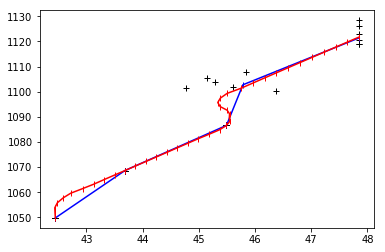

In [48]:
# x_truth=local_x[id_num]
# y_truth=local_y[id_num]
# plt.plot(s_all[:,0],s_all[:,1],'+',color='black')
# plt.plot(x_val,y_val, label = "val", color='blue', marker='|')
# plt.plot(x_truth,y_truth, label = "truth", color='red', marker='|')
# for i in range(points_num):
#     ts = [t/100.0 for t in range(101)]
#     points = bezier(ts)
#     bezier = make_bezier(s_list[i][known_trajectory:])
#     points=np.array(points)
#     plt.plot(points[:,0],points[:,1], label = "ran", color='green')
# plt.show()
# plt.clf()

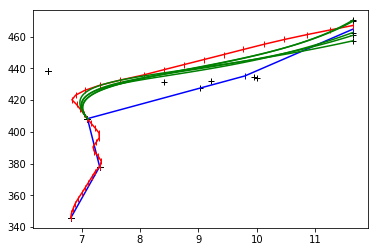

In [147]:
# for i in range(5-known_trajectory):
# ts = [t/100.0 for t in range(101)]
# bezier = make_bezier(xy_val[known_trajectory:])
# points = bezier(ts)
# points=np.array(points)
    
x_truth=local_x[id_num]
y_truth=local_y[id_num]
plt.plot(s_all[:,0],s_all[:,1],'+',color='black')
plt.plot(x_val,y_val, label = "val", color='blue', marker='|')
plt.plot(x_truth,y_truth, label = "truth", color='red', marker='|')
for i in range(points_num):
    ts = [t/100.0 for t in range(101)]
    bezier = make_bezier(s_list[i][known_trajectory:])
    points = bezier(ts)
    points=np.array(points)
    plt.plot(points[:,0],points[:,1], label = "ran", color='green')
    
    
# plt.plot(points[:,0],points[:,1], label = "ran", color='green', marker='|')
# plt.plot(x_val,y_val_ran, label = "ran", color='green', marker='|')
# plt.scatter(x1,y1,s=20,c=T,alpha=0.5)
plt.show()

In [ ]:
# mu = np.array([[41.776, 1452.031]])
# Sigma = np.array([[1, 0], [0, 3]])
# R = cholesky(Sigma)
# s = np.dot(np.random.randn(10, 2), R) + mu
# plt.plot(s[:,0],s[:,1],'+')
# plt.show()
# s

In [ ]:
plt.plot(x_truth,y_truth)

In [ ]:
# def linear_reg(arr):
#     f40=[]
#     f30=[]
#     f20=[]
#     f10=[]
#     zeros_arr=np.zeros([1,len(arr)])
#     for i in range(len(arr)):
#         f40.append(arr[i]*3.12+20.5)
#         f30.append(arr[i]*2.425+12.8)
#         f20.append(arr[i]*1.66+6.515)
#         f10.append(arr[i]*0.829+2.015)
#     f10_40=[f10]+[f20]+[f30]+[f40]
#     f10_40=np.array(f10_40)
#     f10_40=np.vstack((zeros_arr,f10_40))
#     f10_40=np.transpose(f10_40)
#     for i in range(len(f10_40[0])):
#         f10_40[:,i]=local_y[:,0]+f10_40[:,i]
#     return f10_40

In [ ]:
# def ransac_reg(arr):
#     f40=[]
#     f30=[]
#     f20=[]
#     f10=[]
#     zeros_arr=np.zeros([1,len(arr)])
#     for i in range(len(arr)):
#         f40.append(arr[i]*2.53+35.25)
#         f30.append(arr[i]*2.42+10.44)
#         f20.append(arr[i]*1.826+1.89)
#         f10.append(arr[i]*0.87+0.854)
#     f10_40=[f10]+[f20]+[f30]+[f40]
#     f10_40=np.array(f10_40)
#     f10_40=np.vstack((zeros_arr,f10_40))
#     f10_40=np.transpose(f10_40)
#     for i in range(len(f10_40[0])):
#         f10_40[:,i]=local_y[:,0]+f10_40[:,i]
#     return f10_40

In [ ]:
f0_40_line=linear_reg(vy_list[:,0])
f0_40_ransac=ransac_reg(vy_list[:,0])

In [ ]:
def creat_points(frames, point_num,y_list,vy_list,v_list,data_num):
    v=[]
    vy=[]
    l=[]
    for i in range(point_num):
        total_y=0
        start_frame = random.randint(0, 40-frames)
        end_frame = start_frame + frames
        point_id = random.randint(0, data_num-1)
        v.append(v_list[point_id][start_frame])
        vy.append(vy_list[point_id][start_frame])
        for a in range(frames-1):
            total_y+=y_list[point_id][start_frame+1+a]
        l.append(total_y)
    return v,vy,l

In [ ]:
vy=np.reshape(vy,[-1,1])
l=np.array(l)
X = vy
Y = l

# 用普通线性模型拟合X，y
model = linear_model.LinearRegression()
model.fit(X, Y)

# 使用RANSAC算法拟合X,y
model_ransac = linear_model.RANSACRegressor(linear_model.LinearRegression())
model_ransac.fit(X, Y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# 使用一般回归模型和RANSAC算法分别对测试数据做预测
line_X = np.arange(0, 80)
line_y = model.predict(line_X[:, np.newaxis])
line_y_ransac = model_ransac.predict(line_X[:, np.newaxis])

# print("真实数据参数：", coef)
print("线性回归模型参数：", model.coef_,model.intercept_)
print("RANSAC算法参数： ", model_ransac.estimator_.coef_,model_ransac.estimator_.intercept_)

plt.plot(X[inlier_mask], Y[inlier_mask], '.g', label='Inliers')
plt.plot(X[outlier_mask], Y[outlier_mask], '.r', label='Outliers')
plt.plot(line_X, line_y, '-k', label='Linear Regression')
plt.plot(line_X, line_y_ransac, '-b', label="RANSAC Regression")
plt.legend(loc='upper left')
plt.show()

In [ ]:
v,vy,l=creat_points(frames=40,point_num=500,y_list=y_list,vy_list=vy_list,v_list=v_list,data_num=data_num)

In [ ]:
# def acc()
# pre_ransac=model_ransac.predict(vy4)
# pre_liner=model.predict(vy4)
# cha=pre_ransac-l4
# cha_list=[]
# for i in range(len(cha)):
#     if abs(cha[i])<=10:
#         cha_list.append(abs(cha[i]))
# cha_xian=pre_liner-l4
# xian_list=[]
# for i in range(len(cha_xian)):
#     if abs(cha_xian[i])<=10:
#         xian_list.append(abs(cha_xian[i]))
        
# ran=len(cha_list)/454
# xian=len(xian_list)/454

# print(ran,xian)

In [ ]:
pre_ransac

In [ ]:
# import math
# u = 30   # 均值μ
# u01 = -2
# sig = math.sqrt(0.2)  # 标准差δ
# sig01 = math.sqrt(1)
# sig02 = math.sqrt(10)
# sig_u01 = math.sqrt(0.5)
# x = np.linspace(u - 3*sig, u + 3*sig, 50)
# x_01 = np.linspace(u - 6 * sig, u + 6 * sig, 50)
# x_02 = np.linspace(u - 20 * sig, u + 20 * sig, 10)
# x_u01 = np.linspace(u - 10 * sig, u + 1 * sig, 50)
# print(x_02)
# y_sig = np.exp(-(x - u) ** 2 /(2* sig **2))/(math.sqrt(2*math.pi)*sig)
# y_sig01 = np.exp(-(x_01 - u) ** 2 /(2* sig01 **2))/(math.sqrt(2*math.pi)*sig01)
# y_sig02 = np.exp(-(x_02 - u) ** 2 / (2 * sig02 ** 2)) / (math.sqrt(2 * math.pi) * sig02)
# y_sig_u01 = np.exp(-(x_u01 - u01) ** 2 / (2 * sig_u01 ** 2)) / (math.sqrt(2 * math.pi) * sig_u01)
# print(y_sig02)
# plt.plot(x, y_sig, "r-", linewidth=2)
# plt.plot(x_01, y_sig01, "g-", linewidth=2)
# plt.plot(x_02, y_sig02, "b-", linewidth=2)
# plt.plot(x_u01, y_sig_u01, "m-", linewidth=2)
# # plt.plot(x, y, 'r-', x, y, 'go', linewidth=2,markersize=8)
# plt.grid(True)
# plt.show()


In [ ]:
# y_center=pre_liner
# total_ylist=[]
# # x_center=x_list
# for i in range(data_num):
# #     ux = x_center[i]   # 均值μ
#     uy = y_center[i]
# #     sigx = math.sqrt(0.2)
#     sigy = math.sqrt(10)
# #     xx = np.linspace(ux - 2 * sigx, ux + 2 * sigx, 10)# 标准差δ
# #     xy = np.exp(-(xx - ux) ** 2 /(2* sigx **2))/(math.sqrt(2*math.pi)*sigx)
#     yx = np.linspace(uy - 20 * sigx, uy + 20 * sigx, 10)# 标准差δ
#     yy = np.exp(-(yx - uy) ** 2 /(2* sigy **2))/(math.sqrt(2*math.pi)*sigy)
#     total_ylist.append(yx)
# total_ylist

In [ ]:
# l

In [ ]:
x0_40[0]

In [ ]:
y0_40[0]